Natural language processing (NLP) involves the observation and manipulation of text strings, including but not limited to: transforming orthographies, tagging things within a text (such as parts-of-speech, syntax, proper nouns), counting things (e.g., word frequencies), and segmenting (dividing a text by sentences or by words). We'll cover a few of these here.

# Segmenting text by sentence

Latin orthography uses a few characters for sentence-final punctuation ('.', '?', '!'), however problems arise because "." may also be used in non-senentence-final situations (most frequently praenomina -- 'M. Tullius Cicero', 'Cn. Pompeius Magnus').

For Greek texts, similar challenges arise with periods (usually in the form of ellipses '...') being used as an editorial convention for missing characters or words.

In [1]:
# Let's start by binding a text string to a variable

# intro to Cato's de agricultura
cato_agri_praef = "Est interdum praestare mercaturis rem quaerere, nisi tam periculosum sit, et item foenerari, si tam honestum. Maiores nostri sic habuerunt et ita in legibus posiverunt: furem dupli condemnari, foeneratorem quadrupli. Quanto peiorem civem existimarint foeneratorem quam furem, hinc licet existimare. Et virum bonum quom laudabant, ita laudabant: bonum agricolam bonumque colonum; amplissime laudari existimabatur qui ita laudabatur. Mercatorem autem strenuum studiosumque rei quaerendae existimo, verum, ut supra dixi, periculosum et calamitosum. At ex agricolis et viri fortissimi et milites strenuissimi gignuntur, maximeque pius quaestus stabilissimusque consequitur minimeque invidiosus, minimeque male cogitantes sunt qui in eo studio occupati sunt. Nunc, ut ad rem redeam, quod promisi institutum principium hoc erit."

In [2]:
print(cato_agri_praef)

Est interdum praestare mercaturis rem quaerere, nisi tam periculosum sit, et item foenerari, si tam honestum. Maiores nostri sic habuerunt et ita in legibus posiverunt: furem dupli condemnari, foeneratorem quadrupli. Quanto peiorem civem existimarint foeneratorem quam furem, hinc licet existimare. Et virum bonum quom laudabant, ita laudabant: bonum agricolam bonumque colonum; amplissime laudari existimabatur qui ita laudabatur. Mercatorem autem strenuum studiosumque rei quaerendae existimo, verum, ut supra dixi, periculosum et calamitosum. At ex agricolis et viri fortissimi et milites strenuissimi gignuntur, maximeque pius quaestus stabilissimusque consequitur minimeque invidiosus, minimeque male cogitantes sunt qui in eo studio occupati sunt. Nunc, ut ad rem redeam, quod promisi institutum principium hoc erit.


In [3]:
# http://docs.cltk.org/en/latest/latin.html#sentence-tokenization

from cltk.tokenize.sentence import TokenizeSentence

In [4]:
tokenizer = TokenizeSentence('latin')

In [5]:
cato_sentence_tokens = tokenizer.tokenize_sentences(cato_agri_praef)

In [6]:
print(cato_sentence_tokens)

['Est interdum praestare mercaturis rem quaerere, nisi tam periculosum sit, et item foenerari, si tam honestum.', 'Maiores nostri sic habuerunt et ita in legibus posiverunt:', 'furem dupli condemnari, foeneratorem quadrupli.', 'Quanto peiorem civem existimarint foeneratorem quam furem, hinc licet existimare.', 'Et virum bonum quom laudabant, ita laudabant:', 'bonum agricolam bonumque colonum; amplissime laudari existimabatur qui ita laudabatur.', 'Mercatorem autem strenuum studiosumque rei quaerendae existimo, verum, ut supra dixi, periculosum et calamitosum.', 'At ex agricolis et viri fortissimi et milites strenuissimi gignuntur, maximeque pius quaestus stabilissimusque consequitur minimeque invidiosus, minimeque male cogitantes sunt qui in eo studio occupati sunt.', 'Nunc, ut ad rem redeam, quod promisi institutum principium hoc erit.']


In [7]:
# This has correctly identified 9 sentences
print(len(cato_sentence_tokens))

9


In [8]:
# viewed another way
for sentence in cato_sentence_tokens:
    print(sentence)
    print()

Est interdum praestare mercaturis rem quaerere, nisi tam periculosum sit, et item foenerari, si tam honestum.

Maiores nostri sic habuerunt et ita in legibus posiverunt:

furem dupli condemnari, foeneratorem quadrupli.

Quanto peiorem civem existimarint foeneratorem quam furem, hinc licet existimare.

Et virum bonum quom laudabant, ita laudabant:

bonum agricolam bonumque colonum; amplissime laudari existimabatur qui ita laudabatur.

Mercatorem autem strenuum studiosumque rei quaerendae existimo, verum, ut supra dixi, periculosum et calamitosum.

At ex agricolis et viri fortissimi et milites strenuissimi gignuntur, maximeque pius quaestus stabilissimusque consequitur minimeque invidiosus, minimeque male cogitantes sunt qui in eo studio occupati sunt.

Nunc, ut ad rem redeam, quod promisi institutum principium hoc erit.



# Tokenize words

The CLTK offers several ways to segment word tokens, that is to automatically detect word boundaries. For most languages, a simple whitespace or punctation token suffices, however there are important edge cases.

For general tokenization, one of the methods here will likely work: <http://docs.cltk.org/en/latest/multilingual.html#word-tokenization>.

For the Latin language, we have a special word tokenizer which separates enclitics such as '-que' and '-ve'.

In [9]:
# import general-use word tokenizer
from cltk.tokenize.word import nltk_tokenize_words

In [10]:
cato_word_tokens = nltk_tokenize_words(cato_agri_praef)

In [11]:
print(cato_word_tokens)

['Est', 'interdum', 'praestare', 'mercaturis', 'rem', 'quaerere', ',', 'nisi', 'tam', 'periculosum', 'sit', ',', 'et', 'item', 'foenerari', ',', 'si', 'tam', 'honestum', '.', 'Maiores', 'nostri', 'sic', 'habuerunt', 'et', 'ita', 'in', 'legibus', 'posiverunt', ':', 'furem', 'dupli', 'condemnari', ',', 'foeneratorem', 'quadrupli', '.', 'Quanto', 'peiorem', 'civem', 'existimarint', 'foeneratorem', 'quam', 'furem', ',', 'hinc', 'licet', 'existimare', '.', 'Et', 'virum', 'bonum', 'quom', 'laudabant', ',', 'ita', 'laudabant', ':', 'bonum', 'agricolam', 'bonumque', 'colonum', ';', 'amplissime', 'laudari', 'existimabatur', 'qui', 'ita', 'laudabatur', '.', 'Mercatorem', 'autem', 'strenuum', 'studiosumque', 'rei', 'quaerendae', 'existimo', ',', 'verum', ',', 'ut', 'supra', 'dixi', ',', 'periculosum', 'et', 'calamitosum', '.', 'At', 'ex', 'agricolis', 'et', 'viri', 'fortissimi', 'et', 'milites', 'strenuissimi', 'gignuntur', ',', 'maximeque', 'pius', 'quaestus', 'stabilissimusque', 'consequitur', 

Notice that punctuation is divided here and thus counted as word. One way to remove these is to use a list comprehension:

In [12]:
cato_word_tokens_no_punt = [token for token in cato_word_tokens if token not in ['.', ',', ':', ';']]

In [13]:
print(cato_word_tokens_no_punt)

['Est', 'interdum', 'praestare', 'mercaturis', 'rem', 'quaerere', 'nisi', 'tam', 'periculosum', 'sit', 'et', 'item', 'foenerari', 'si', 'tam', 'honestum', 'Maiores', 'nostri', 'sic', 'habuerunt', 'et', 'ita', 'in', 'legibus', 'posiverunt', 'furem', 'dupli', 'condemnari', 'foeneratorem', 'quadrupli', 'Quanto', 'peiorem', 'civem', 'existimarint', 'foeneratorem', 'quam', 'furem', 'hinc', 'licet', 'existimare', 'Et', 'virum', 'bonum', 'quom', 'laudabant', 'ita', 'laudabant', 'bonum', 'agricolam', 'bonumque', 'colonum', 'amplissime', 'laudari', 'existimabatur', 'qui', 'ita', 'laudabatur', 'Mercatorem', 'autem', 'strenuum', 'studiosumque', 'rei', 'quaerendae', 'existimo', 'verum', 'ut', 'supra', 'dixi', 'periculosum', 'et', 'calamitosum', 'At', 'ex', 'agricolis', 'et', 'viri', 'fortissimi', 'et', 'milites', 'strenuissimi', 'gignuntur', 'maximeque', 'pius', 'quaestus', 'stabilissimusque', 'consequitur', 'minimeque', 'invidiosus', 'minimeque', 'male', 'cogitantes', 'sunt', 'qui', 'in', 'eo', '

In [14]:
# number words
print(len(cato_word_tokens_no_punt))

109


In [15]:
# the set() function removes duplicates from a list
# let's see how many unique words are in here
cato_word_tokens_no_punt_unique = set(cato_word_tokens_no_punt)
print(cato_word_tokens_no_punt_unique)

{'quaerendae', 'ita', 'rem', 'si', 'strenuum', 'colonum', 'studio', 'mercaturis', 'maximeque', 'occupati', 'legibus', 'tam', 'dixi', 'cogitantes', 'quom', 'ex', 'calamitosum', 'gignuntur', 'quaestus', 'existimo', 'Quanto', 'periculosum', 'male', 'sic', 'minimeque', 'condemnari', 'in', 'Mercatorem', 'quaerere', 'nisi', 'Est', 'bonumque', 'supra', 'rei', 'autem', 'existimare', 'agricolis', 'fortissimi', 'invidiosus', 'laudari', 'hinc', 'existimarint', 'existimabatur', 'eo', 'foenerari', 'peiorem', 'honestum', 'quadrupli', 'interdum', 'posiverunt', 'At', 'dupli', 'item', 'viri', 'stabilissimusque', 'promisi', 'Maiores', 'foeneratorem', 'Nunc', 'qui', 'principium', 'habuerunt', 'ad', 'sit', 'praestare', 'nostri', 'hoc', 'pius', 'sunt', 'quam', 'redeam', 'bonum', 'furem', 'ut', 'laudabatur', 'quod', 'institutum', 'civem', 'erit', 'virum', 'strenuissimi', 'laudabant', 'verum', 'licet', 'agricolam', 'Et', 'studiosumque', 'amplissime', 'milites', 'et', 'consequitur'}


In [16]:
print(len(cato_word_tokens_no_punt_unique))

91


In [17]:
# there's a mistake here though
# capitalized words ('At', 'Est', 'Nunc') would be counted incorrectly
# so let's lower the input string and try again
cato_agri_praef_lowered = cato_agri_praef.lower()
cato_word_tokens_lowered = nltk_tokenize_words(cato_agri_praef_lowered)

In [18]:
# now see all lowercase
print(cato_word_tokens_lowered)

['est', 'interdum', 'praestare', 'mercaturis', 'rem', 'quaerere', ',', 'nisi', 'tam', 'periculosum', 'sit', ',', 'et', 'item', 'foenerari', ',', 'si', 'tam', 'honestum', '.', 'maiores', 'nostri', 'sic', 'habuerunt', 'et', 'ita', 'in', 'legibus', 'posiverunt', ':', 'furem', 'dupli', 'condemnari', ',', 'foeneratorem', 'quadrupli', '.', 'quanto', 'peiorem', 'civem', 'existimarint', 'foeneratorem', 'quam', 'furem', ',', 'hinc', 'licet', 'existimare', '.', 'et', 'virum', 'bonum', 'quom', 'laudabant', ',', 'ita', 'laudabant', ':', 'bonum', 'agricolam', 'bonumque', 'colonum', ';', 'amplissime', 'laudari', 'existimabatur', 'qui', 'ita', 'laudabatur', '.', 'mercatorem', 'autem', 'strenuum', 'studiosumque', 'rei', 'quaerendae', 'existimo', ',', 'verum', ',', 'ut', 'supra', 'dixi', ',', 'periculosum', 'et', 'calamitosum', '.', 'at', 'ex', 'agricolis', 'et', 'viri', 'fortissimi', 'et', 'milites', 'strenuissimi', 'gignuntur', ',', 'maximeque', 'pius', 'quaestus', 'stabilissimusque', 'consequitur', 

In [19]:
# now let's do everything again
cato_word_tokens_no_punt_lowered = [token for token in cato_word_tokens_lowered if token not in ['.', ',', ':', ';']]
cato_word_tokens_no_punt_unique_lowered = set(cato_word_tokens_no_punt_lowered)
print(len(cato_word_tokens_no_punt_unique_lowered))

90


Observe that this corrected count has two fewer unique words

## Tokenizing words with the CLTK Latin tokenizer

We have a tokenizer which removes enclitics and counts them as separate words. For example, we have the word 'minimeque' which ought to become 'minime' and 'que'.

In [20]:
from cltk.tokenize.word import WordTokenizer
word_tokenizer = WordTokenizer('latin')
cato_cltk_word_tokens = word_tokenizer.tokenize(cato_agri_praef_lowered)
cato_cltk_word_tokens_no_punt = [token for token in cato_cltk_word_tokens if token not in ['.', ',', ':', ';']]

# now you can see the word '-que'
print(cato_cltk_word_tokens_no_punt)

['est', 'interdum', 'praestare', 'mercaturis', 'rem', 'quaerere', 'nisi', 'tam', 'periculosum', 'sit', 'et', 'item', 'foenerari', 'si', 'tam', 'honestum', 'maiores', 'nostri', 'sic', 'habuerunt', 'et', 'ita', 'in', 'legibus', 'posiverunt', 'furem', 'dupli', 'condemnari', 'foeneratorem', 'quadrupli', 'quanto', 'peiorem', 'civem', 'existimarint', 'foeneratorem', 'quam', 'furem', 'hinc', 'licet', 'existimare', 'et', 'virum', 'bonum', 'quom', 'laudabant', 'ita', 'laudabant', 'bonum', 'agricolam', 'bonum', '-que', 'colonum', 'amplissime', 'laudari', 'existimabatur', 'qui', 'ita', 'laudabatur', 'mercatorem', 'autem', 'strenuum', 'studiosum', '-que', 'rei', 'quaerendae', 'existimo', 'verum', 'ut', 'supra', 'dixi', 'periculosum', 'et', 'calamitosum', 'at', 'ex', 'agricolis', 'et', 'viri', 'fortissimi', 'et', 'milites', 'strenuissimi', 'gignuntur', 'maxime', '-que', 'pius', 'quaestus', 'stabilissimus', '-que', 'consequitur', 'minime', '-que', 'invidiosus', 'minime', '-que', 'male', 'cogitantes'

In [21]:
# more total words
print(len(cato_cltk_word_tokens_no_punt))  # was 109

115


In [22]:
# more accurate unique words
cato_cltk_word_tokens_no_punt_unique = set(cato_cltk_word_tokens_no_punt)
print(len(cato_cltk_word_tokens_no_punt_unique))  # balances out to be the same (90)

90


In [23]:
# .difference() is an easy way to compare two sets
cato_cltk_word_tokens_no_punt_unique.difference(cato_word_tokens_no_punt_unique_lowered)

{'-que', 'maxime', 'minime', 'stabilissimus', 'studiosum'}

# Normalization

Normalization is not exciting but an important task in NLP. The CLTK offers help for Greek, Latin, Sanskrit, and Egyptian.


## Latin

One of the most common issues is the use of 'j' and 'v' (for 'i' and 'u', respectively) before vowels. Docs: <http://docs.cltk.org/en/latest/latin.html#converting-j-to-i-v-to-u>.

In [24]:
from cltk.stem.latin.j_v import JVReplacer
j = JVReplacer()
replaced_text = j.replace('vem jam')
print(replaced_text)

uem iam


## Greek
The challenge with Greek is working with Unicode (and you should always use Unicode). Some guidance here: <http://docs.cltk.org/en/latest/greek.html#accentuation>.

# Getting frequencies

Word counting ranges from the very simple to very complex.

In [25]:
# let's start with the easiest method, which is to use Python's internal Counter()
from collections import Counter

In [26]:
# don't give the unique variation, but count all tokens
cato_word_counts_counter = Counter(cato_cltk_word_tokens_no_punt)
print(cato_word_counts_counter)

Counter({'-que': 6, 'et': 6, 'bonum': 3, 'ita': 3, 'foeneratorem': 2, 'rem': 2, 'ut': 2, 'periculosum': 2, 'minime': 2, 'qui': 2, 'furem': 2, 'in': 2, 'tam': 2, 'laudabant': 2, 'sunt': 2, 'foenerari': 1, 'mercatorem': 1, 'quom': 1, 'maxime': 1, 'quaerendae': 1, 'si': 1, 'honestum': 1, 'habuerunt': 1, 'existimare': 1, 'colonum': 1, 'maiores': 1, 'interdum': 1, 'studio': 1, 'mercaturis': 1, 'ad': 1, 'sit': 1, 'occupati': 1, 'legibus': 1, 'praestare': 1, 'dixi': 1, 'nunc': 1, 'quam': 1, 'calamitosum': 1, 'quod': 1, 'nostri': 1, 'ex': 1, 'stabilissimus': 1, 'hoc': 1, 'gignuntur': 1, 'quaestus': 1, 'agricolam': 1, 'existimo': 1, 'civem': 1, 'male': 1, 'sic': 1, 'est': 1, 'principium': 1, 'redeam': 1, 'cogitantes': 1, 'condemnari': 1, 'laudabatur': 1, 'quaerere': 1, 'nisi': 1, 'studiosum': 1, 'erit': 1, 'supra': 1, 'rei': 1, 'autem': 1, 'agricolis': 1, 'virum': 1, 'strenuissimi': 1, 'institutum': 1, 'fortissimi': 1, 'invidiosus': 1, 'licet': 1, 'laudari': 1, 'hinc': 1, 'quanto': 1, 'existima

In [27]:
# the data structure of cato_word_counts_counter is a 'dictionary' in Python
# get the frequency of particular words like this:
print(cato_word_counts_counter['et'])

6


In [28]:
print(cato_word_counts_counter['qui'])

2


In [29]:
print(cato_word_counts_counter['maiores'])

1


# Visualizing measures

Lexical diversity is a simple measure of unique words divided by total words. This measures how realtively verbose an author is.

Such lexical measures are simple but can be illuminating nevertheless.

For example, here are a few visualizations done on the Greek canon.

For code, see <https://github.com/kylepjohnson/notebooks/tree/master/public_talks/2016_10_26_harvard>.

In [30]:
# lex diversity of this little paragraph
print(len(cato_cltk_word_tokens_no_punt_unique) / len(cato_cltk_word_tokens_no_punt))
# meaning this is the ratio of unique to re-reused words

0.782608695652174


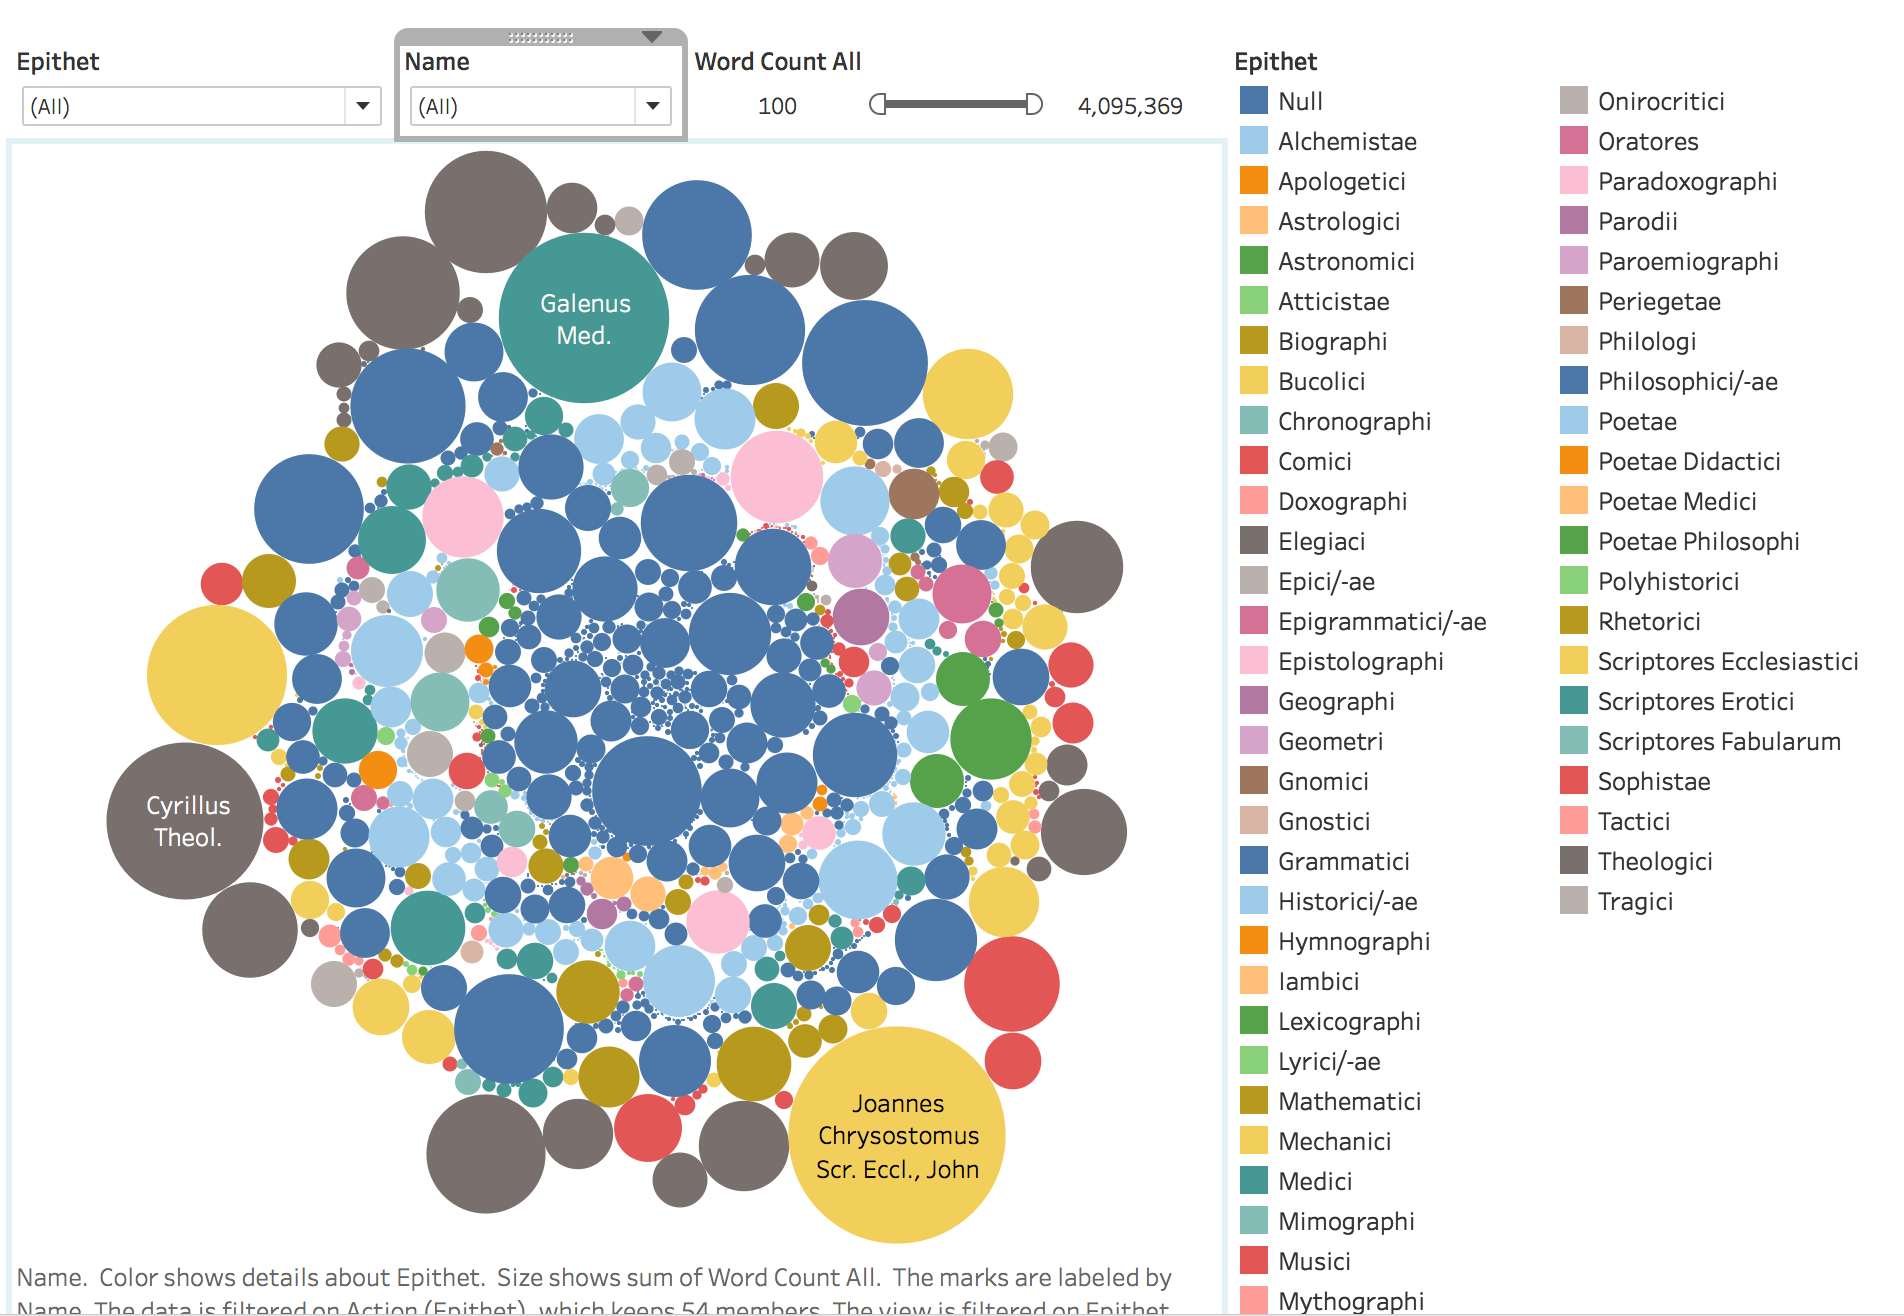

In [31]:
# of suriving word counts
from IPython.display import Image
Image('images/tableau_bubble.png')

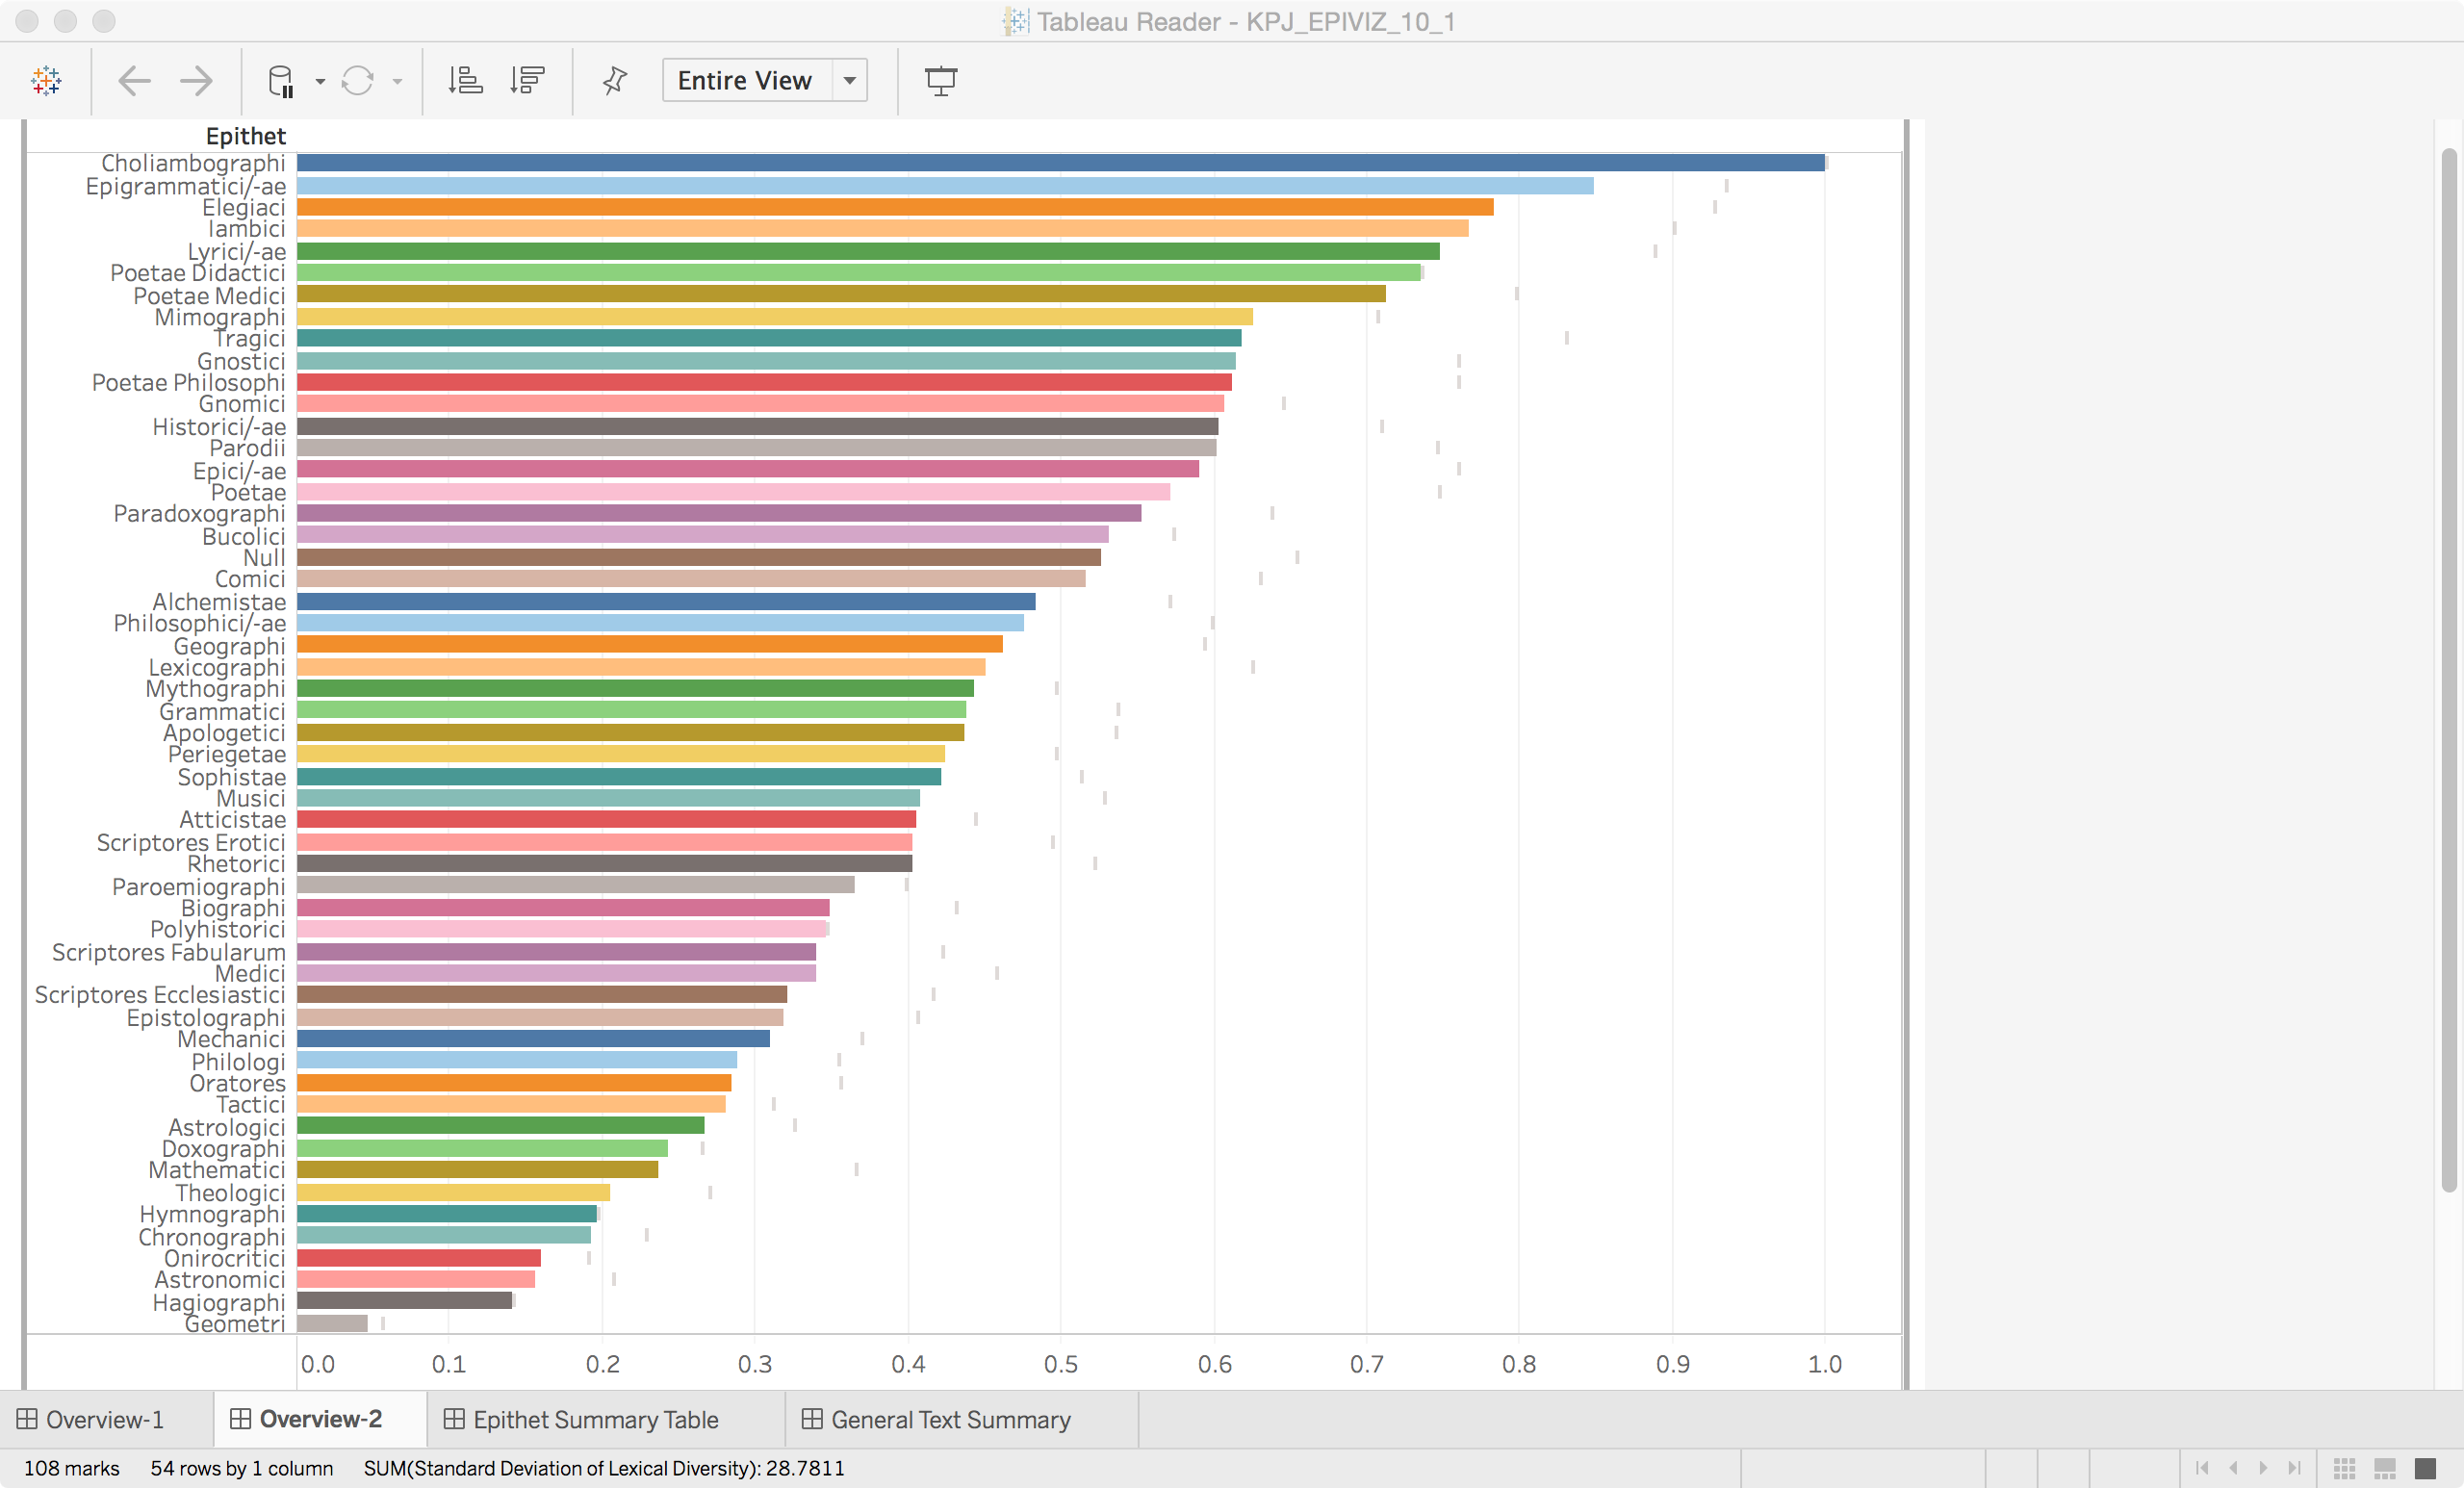

In [32]:
Image('images/lexical_diversity_greek_canon.png')

# Stopword filtering

We have stopword lists for many languages.

In [34]:
# http://docs.cltk.org/en/latest/latin.html#stopword-filtering

# easist way to do this in Python is to use a list comprehension to remove stopwords

from cltk.stop.latin.stops import STOPS_LIST

print(STOPS_LIST)

['ab', 'ac', 'ad', 'adhic', 'aliqui', 'aliquis', 'an', 'ante', 'apud', 'at', 'atque', 'aut', 'autem', 'cum', 'cur', 'de', 'deinde', 'dum', 'ego', 'enim', 'ergo', 'es', 'est', 'et', 'etiam', 'etsi', 'ex', 'fio', 'haud', 'hic', 'iam', 'idem', 'igitur', 'ille', 'in', 'infra', 'inter', 'interim', 'ipse', 'is', 'ita', 'magis', 'modo', 'mox', 'nam', 'ne', 'nec', 'necque', 'neque', 'nisi', 'non', 'nos', 'o', 'ob', 'per', 'possum', 'post', 'pro', 'quae', 'quam', 'quare', 'qui', 'quia', 'quicumque', 'quidem', 'quilibet', 'quis', 'quisnam', 'quisquam', 'quisque', 'quisquis', 'quo', 'quoniam', 'sed', 'si', 'sic', 'sive', 'sub', 'sui', 'sum', 'super', 'suus', 'tam', 'tamen', 'trans', 'tu', 'tum', 'ubi', 'uel', 'uero', 'unus', 'ut']


In [35]:
cato_no_stops = [w for w in cato_cltk_word_tokens_no_punt if not w in STOPS_LIST]
# observe no stopwords
#! consider others you might want to add to the Latin stops list
print(cato_no_stops)

['interdum', 'praestare', 'mercaturis', 'rem', 'quaerere', 'periculosum', 'sit', 'item', 'foenerari', 'honestum', 'maiores', 'nostri', 'habuerunt', 'legibus', 'posiverunt', 'furem', 'dupli', 'condemnari', 'foeneratorem', 'quadrupli', 'quanto', 'peiorem', 'civem', 'existimarint', 'foeneratorem', 'furem', 'hinc', 'licet', 'existimare', 'virum', 'bonum', 'quom', 'laudabant', 'laudabant', 'bonum', 'agricolam', 'bonum', '-que', 'colonum', 'amplissime', 'laudari', 'existimabatur', 'laudabatur', 'mercatorem', 'strenuum', 'studiosum', '-que', 'rei', 'quaerendae', 'existimo', 'verum', 'supra', 'dixi', 'periculosum', 'calamitosum', 'agricolis', 'viri', 'fortissimi', 'milites', 'strenuissimi', 'gignuntur', 'maxime', '-que', 'pius', 'quaestus', 'stabilissimus', '-que', 'consequitur', 'minime', '-que', 'invidiosus', 'minime', '-que', 'male', 'cogitantes', 'sunt', 'eo', 'studio', 'occupati', 'sunt', 'nunc', 'rem', 'redeam', 'quod', 'promisi', 'institutum', 'principium', 'hoc', 'erit']
